# Introduction

TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.

This notebook Provides basic starting point and boiler plate code for Tensorflow 2.0 with respect Model creation and training. 

The approch followed is to create, train, evaluate Models with same architechture, same MNIST dataset using different ways of building Models from basic to advanced method and different ways of training at basic level. 

## Import Libraries

Below are some basic Libraries  related to Tensorflow and Keras 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,Layer,Dense,Flatten

Below are Libraries for needed to manupulate and visualize 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## MNIST dataset

The MNIST dataset has handwritten digits as image files. 
It has a training set of 60,000 examples, and a test set of 10,000 examples

## Import MNIST dataset

# Different ways of Building Model

Keras datasets library has the mnist dataset inbuilt

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data() 

## Sequential Model

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.


### Model Architecture 

In [5]:
def create_model():
  model=tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  Dense(units=512,activation=tf.nn.relu),
  Dense(units=512,activation=tf.nn.relu),
  Dense(units=512,activation=tf.nn.relu),
  Dense(units=10,activation=tf.nn.softmax)])
  return model

### Create Model

In [6]:
model=create_model()


### Model Summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


### Visualize Model

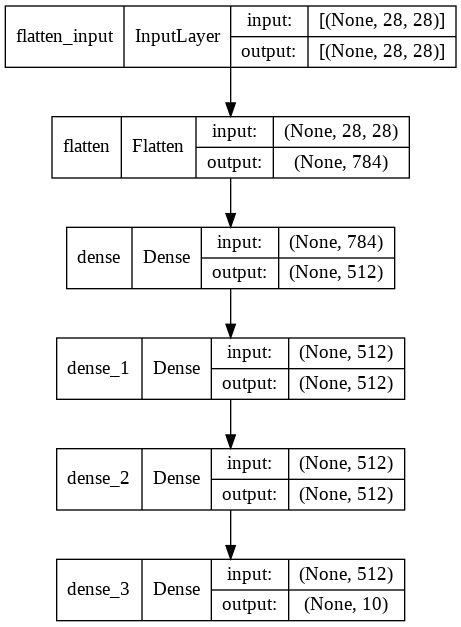

In [8]:
keras.utils.plot_model(model, show_shapes=True)

### Compile Model

Compile step is a key step that users Optimizer, Loss fuction and Metrics used for Back propagation. Please refer below high level insignt

The Loss Function is one of the important components of Neural Networks. Loss is nothing but a prediction error of Neural Net. And the method to calculate the loss is called Loss Function. In simple words, the Loss is used to calculate the gradients. And gradients are used to update the weights of the Neural Net.

Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. Optimizers help to get results faster.

Metrics can be accuracy, loss etc to assess the performance of Trained model

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'],loss='sparse_categorical_crossentropy')


### Train Model

Trains the model for a fixed number of epochs. At each epoch the weights are adjusted through back probagation. 

We can see every epoc the sparse_categorical_crossentropy loss is reduced and the train accuracy is increased

In [10]:
model.fit(x_train,y_train,epochs=15,batch_size=1024)

Epoch 1/15
59/59 [==============================] - 1s 3ms/step - loss: 8.4750 - accuracy: 0.7977
Epoch 2/15
59/59 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.9366
Epoch 3/15
59/59 [==============================] - 0s 3ms/step - loss: 0.1572 - accuracy: 0.9632
Epoch 4/15
59/59 [==============================] - 0s 3ms/step - loss: 0.0824 - accuracy: 0.9789
Epoch 5/15
59/59 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9883
Epoch 6/15
59/59 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9950
Epoch 7/15
59/59 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9980
Epoch 8/15
59/59 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9996
Epoch 9/15
59/59 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9999
Epoch 10/15
59/59 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 11/15
59/59 [

### Evaluate Model with Test data

Test data is used evaluate the performance of the model trained. 

In [11]:
testaccuracy=model.evaluate(x_test,y_test)
print("The test accuracy is :", np.round(testaccuracy[1]*100,2),"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.2533 - accuracy: 0.9586
The test accuracy is : 95.86 %


## Model built with Functional APIs

The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

### Model Architecture

In [12]:
def build_model_with_functional():
    
    # instantiate the input Tensor
    input_layer = tf.keras.Input(shape=(28, 28))
    
    # stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(512, activation=tf.nn.relu)(flatten_layer)
    second_dense = tf.keras.layers.Dense(512, activation=tf.nn.relu)(first_dense)
    third_dense = tf.keras.layers.Dense(512, activation=tf.nn.relu)(second_dense)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(third_dense)
    
    # declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

### Create, Visualize, Train and evaluate the model
The same steps explained in sequential model is consolidated here as they are exactly same code

In [13]:
model=build_model_with_functional()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.fit(x_train,y_train,epochs=5,batch_size=1024)
testaccuracy=model.evaluate(x_test,y_test)
print("The test accuracy is :", np.round(testaccuracy[1]*100,2),"%")

Epoch 1/5
59/59 [==============================] - 1s 3ms/step - loss: 9.2116 - accuracy: 0.7801
Epoch 2/5
59/59 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.9315
Epoch 3/5
59/59 [==============================] - 0s 3ms/step - loss: 0.1733 - accuracy: 0.9567
Epoch 4/5
59/59 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9736
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2185 - accuracy: 0.9515
The test accuracy is : 95.15 %


In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable

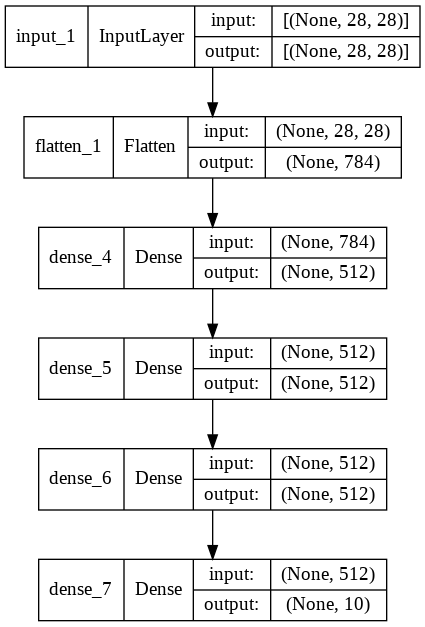

In [15]:
keras.utils.plot_model(model, show_shapes=True)

## Advanced Model Building Methods

This will be used for some advanced needs. Below are few of them. 

1) To build models with multiple inputs and a single output and vice versa.

2) To  share weights between layers in a model 

3) Custom Computations within layers

4) Custom gradient function to be used in back probagation


This section shows custom layer method alone. There are other types like custom Methods, custom gradients etc

### Custom Layer definition

Custom class is defined using the super class Layer class that we imported. 
Activation functions, weights are intialized in the build method
call funtion does the back probagation and updates the weights of the network

In [16]:
class CustomDense(Layer):

    # add an activation parameter
    def __init__(self, units=32, activation=None):
        super(CustomDense, self).__init__()
        self.units = units
        
        # define the activation to get from the built-in activation layers in Keras
        self.activation = tf.keras.activations.get(activation)


    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)
        super().build(input_shape)


    def call(self, inputs):
        
        # pass the computation to the activation layer
        return self.activation(tf.matmul(inputs, self.w) + self.b)

### Model Architecture

In [17]:
def build_model_with_custom_layer():
  model=tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  CustomDense(units=512,activation=tf.nn.relu),
  CustomDense(units=512,activation=tf.nn.relu),
  CustomDense(units=512,activation=tf.nn.relu),
  CustomDense(units=10,activation=tf.nn.softmax)])
  return model

### Create, Visualize, Train and evaluate the model
The same steps explained in sequential model is consolidated here as they are exactly same code

In [18]:
model=build_model_with_custom_layer()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.fit(x_train,y_train,epochs=5,batch_size=1024)
testaccuracy=model.evaluate(x_test,y_test)
print("The test accuracy is :", np.round(testaccuracy[1]*100,2),"%")

Epoch 1/5
59/59 [==============================] - 1s 3ms/step - loss: 6.9926 - accuracy: 0.8236
Epoch 2/5
59/59 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.9421
Epoch 3/5
59/59 [==============================] - 0s 3ms/step - loss: 0.1580 - accuracy: 0.9664
Epoch 4/5
59/59 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9797
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2930 - accuracy: 0.9522
The test accuracy is : 95.22 %


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 custom_dense (CustomDense)  (None, 512)               401920    
                                                                 
 custom_dense_1 (CustomDense  (None, 512)              262656    
 )                                                               
                                                                 
 custom_dense_2 (CustomDense  (None, 512)              262656    
 )                                                               
                                                                 
 custom_dense_3 (CustomDense  (None, 10)               5130      
 )                                                               
                                                      

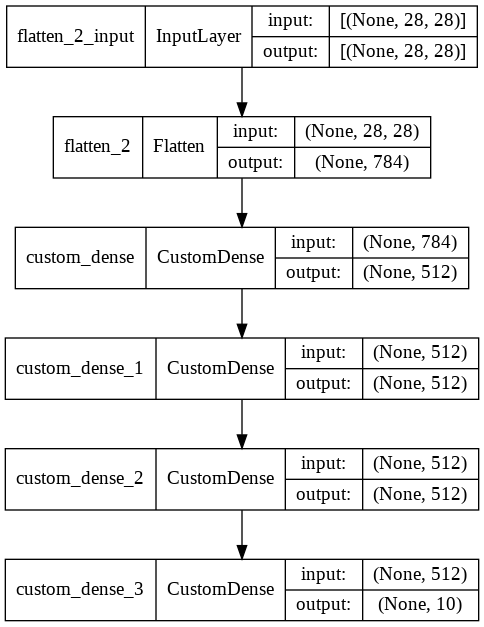

In [20]:
keras.utils.plot_model(model, show_shapes=True)

# Different ways of Training Model

Some of the basic methods of tracking metrics for training and validation and to prevent overfitting.

## Tracking Training metrics

In [21]:
model=create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.fit(x_train,y_train,epochs=5,batch_size=1024)
testaccuracy=model.evaluate(x_test,y_test)
print("The test accuracy is :", np.round(testaccuracy[1]*100,2),"%")

Epoch 1/5
59/59 [==============================] - 1s 3ms/step - loss: 10.1107 - accuracy: 0.7674
Epoch 2/5
59/59 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.9260
Epoch 3/5
59/59 [==============================] - 0s 3ms/step - loss: 0.1724 - accuracy: 0.9547
Epoch 4/5
59/59 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9730
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2094 - accuracy: 0.9520
The test accuracy is : 95.2 %


## Tracking Training & Validation metrics

Validation split option given below make the training to calculate valition metrics that will be used for early stopping and overfitting. 

If we have validation data separately we can provide validaiton_data=[val_Data,val_labels] instead of validation split.

In [22]:
model=create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.fit(x_train,y_train,epochs=50,batch_size=1024,validation_split=0.2)


Epoch 1/50
47/47 [==============================] - 1s 6ms/step - loss: 10.0500 - accuracy: 0.7710 - val_loss: 0.5356 - val_accuracy: 0.9170
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 0.3576 - accuracy: 0.9307 - val_loss: 0.3286 - val_accuracy: 0.9343
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 0.1703 - accuracy: 0.9579 - val_loss: 0.2686 - val_accuracy: 0.9443
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.9761 - val_loss: 0.2526 - val_accuracy: 0.9456
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0485 - accuracy: 0.9865 - val_loss: 0.2398 - val_accuracy: 0.9493
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.9941 - val_loss: 0.2354 - val_accuracy: 0.9517
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0127 - accuracy: 0.9975 - val_loss: 0.2292 - val_accuracy: 0.9555
Epoch 8/50
47/47 [=

### Ploting Train vs Test loss

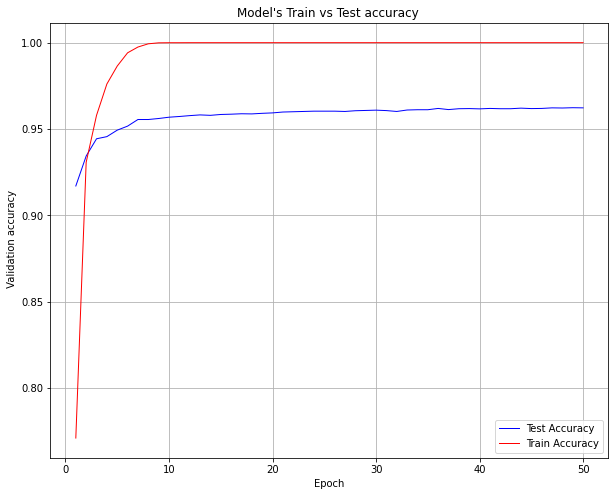

In [24]:

plt.figure(figsize=(10,8))
test_accuracy=model.history.history['val_accuracy']
train_accuracy=model.history.history['accuracy']
epochs_range=range(1,len(test_accuracy)+1)
plt.plot(epochs_range, test_accuracy,'b', linewidth=1,label='Test Accuracy')
plt.plot(epochs_range, train_accuracy,'r', linewidth=1,label='Train Accuracy')
plt.xlabel("Epoch")
plt.ylabel(" Validation accuracy")
plt.title("Model's Train vs Test accuracy ")
plt.legend()
plt.grid()
plt.show()

In [25]:
testaccuracy=model.evaluate(x_test,y_test)
print("The test accuracy is :", np.round(testaccuracy[1]*100,2),"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.2527 - accuracy: 0.9617
The test accuracy is : 96.17 %


## Early stopping to prevent Overfitting

Below code shows how to do early stopping to prevent overfitting.
This code check validation accuracy and if it does not increase for 2 epochs(patience), it stops the train and assigns best possible weights to the model(restore_best_weights=True) 

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_accuracy', patience=2,restore_best_weights=True)] # Early Stopping

model=create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.fit(x_train,y_train,epochs=50,batch_size=1024,validation_split=0.2,callbacks=callbacks)


Epoch 1/50
47/47 [==============================] - 1s 7ms/step - loss: 10.0079 - accuracy: 0.7644 - val_loss: 0.5353 - val_accuracy: 0.9054
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 0.3624 - accuracy: 0.9224 - val_loss: 0.3240 - val_accuracy: 0.9300
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 0.1776 - accuracy: 0.9545 - val_loss: 0.2734 - val_accuracy: 0.9358
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0989 - accuracy: 0.9733 - val_loss: 0.2493 - val_accuracy: 0.9415
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0562 - accuracy: 0.9852 - val_loss: 0.2348 - val_accuracy: 0.9466
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0312 - accuracy: 0.9924 - val_loss: 0.2280 - val_accuracy: 0.9473
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 0.9966 - val_loss: 0.2263 - val_accuracy: 0.9498
Epoch 8/50
47/47 [=

Here we can observe that though we ask the training step to do 50 epochs, it stops in fewer epochs as the validation accuracy has not increased more than 2 times. 

We can use other metrics like Validation loss, training loss, etc to decide when to stop training. 

### Ploting Train vs Test loss

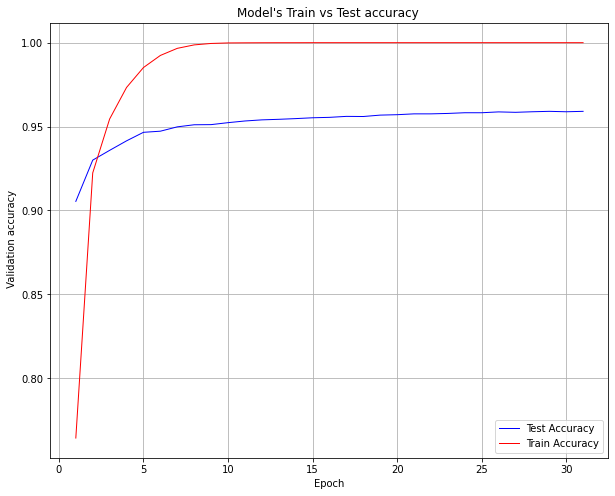

In [28]:

plt.figure(figsize=(10,8))
test_accuracy=model.history.history['val_accuracy']
train_accuracy=model.history.history['accuracy']
epochs_range=range(1,len(test_accuracy)+1)
plt.plot(epochs_range, test_accuracy,'b', linewidth=1,label='Test Accuracy')
plt.plot(epochs_range, train_accuracy,'r', linewidth=1,label='Train Accuracy')
plt.xlabel("Epoch")
plt.ylabel(" Validation accuracy")
plt.title("Model's Train vs Test accuracy ")
plt.legend()
plt.grid()
plt.show()

This is to show above early stoping obersvation graphically. 

# Summary

This notebook provides some starting point to anyone to start coding in tensorflow to build and train models. It also covers some basic tricks like early stopping, tracking  metrics etc 

Below reference can be checked to find different Optimizers, Loss fuctions, early stopping and other advanced techniques to build upon. 

## References

https://www.tensorflow.org/

https://keras.io/

https://www.coursera.org/